In [4]:
!pip install tensorflow==2.11.0 matplotlib
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 6.0 MB 73.3 MB/s 
     |████████████████████████████████| 1.7 MB 68.4 MB/s 
     |████████████████████████████████| 439 kB 76.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.4 MB/s 


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/dataset/archive.zip

Archive:  /content/drive/MyDrive/dataset/archive.zip
replace archive/Forest Recordings/recording_00.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# **Build Data Loading Function**

### **Paths of Files**

In [4]:
CAPUCHIN_FILE = '/content/archive/Parsed_Capuchinbird_Clips/XC3776-3.wav'
NOT_CAPUCHIN_FILE = '/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [ ]:
NOT_CAPUCHIN_FILE

'/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

### **Build Dataloading Function**

In [5]:
def load_wav_16k_mono(filename): 
    file_contents = tf.io.read_file(filename) # Load encoded wav file
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) # Decode wav (tensors by channels) 
    wav = tf.squeeze(wav, axis=-1) # Removes trailing axis
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)  
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000) # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    return wav

In [ ]:
file_contents =tf.io.read_file(CAPUCHIN_FILE)

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

### **Plot Wave**

In [6]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [39]:
wave

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

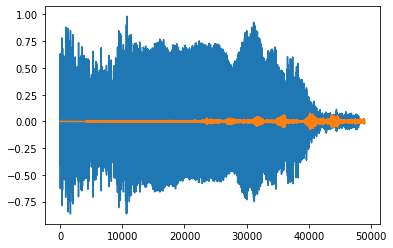

In [7]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# **Create Tensorflow Dataset**

In [8]:
POS = '/content/archive/Parsed_Capuchinbird_Clips'
NEG = '/content/archive/Parsed_Not_Capuchinbird_Clips'

In [11]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [13]:
pos.as_numpy_iterator().next()

b'/content/archive/Parsed_Capuchinbird_Clips/XC227468-4.wav'

In [14]:
len(pos)

217

In [16]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [17]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

### **Add labels and Combine Positive and Negative Samples**

In [15]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [18]:
positives.as_numpy_iterator().next()

(b'/content/archive/Parsed_Capuchinbird_Clips/XC227468-1.wav', 1.0)

In [19]:
negatives.as_numpy_iterator().next()

(b'/content/archive/Parsed_Not_Capuchinbird_Clips/killdeer-sound-7.wav', 0.0)

In [24]:
data.as_numpy_iterator().next()

(b'/content/archive/Parsed_Capuchinbird_Clips/XC16803-2.wav', 1.0)

In [30]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/archive/Parsed_Capuchinbird_Clips/XC79965-2.wav', 1.0)

# **Determine Average Length of a Capuchin Call**

In [45]:
lengths = [] # amplitude
for file in os.listdir('/content/archive/Parsed_Capuchinbird_Clips'):
    tensor_wave = load_wav_16k_mono(f'/content/archive/Parsed_Capuchinbird_Clips/{file}')
    lengths.append(len(tensor_wave))

In [ ]:
os.listdir('/content/archive/Parsed_Capuchinbird_Clips')

### **Calculate Mean, Min and Max**

In [41]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [44]:
54156/16000 # 54156,16000 is amplitude(Hz --> times per second) ,So 3.38475 is Length of the video clip

3.38475

In [42]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [43]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# **Build Preprocessing Function to Convert to Spectrogram**

In [46]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32) #list ของ 0 ตามจำนวนที่ขาด
    wav = tf.concat([zero_padding, wav],0) #เติม 0 เข้าไปในคลิปที่ความถี่ไม่ถึง 48000 ให้ครบ 48000
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [66]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [67]:
spectrogram, label = preprocess(filepath, label)

In [59]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[6.81197166e-01],
        [7.17575133e-01],
        [7.66781628e-01],
        ...,
        [1.17070031e-05],
        [4.89602371e-06],
        [2.05636024e-06]],

       [[6.60253644e-01],
        [6.88057363e-01],
        [7.39176035e-01],
        ...,
        [1.28322117e-05],
        [5.44695149e-06],
        [9.23871994e-07]],

       [[5.15423417e-01],
        [5.18303096e-01],
        [5.90255260e-01],
        ...,
        [8.23764731e-06],
        [9.14195971e-06],
        [1.13546848e-05]],

       ...,

       [[9.63746190e-01],
        [8.84718418e-01],
        [5.59928358e-01],
        ...,
        [6.40850994e-05],
        [1.48080735e-05],
        [1.28746033e-05]],

       [[7.47882962e-01],
        [8.83944333e-01],
        [8.07493806e-01],
        ...,
        [6.15625904e-05],
        [5.87195791e-06],
        [1.22785568e-05]],

       [[1.30622059e-01],
        [9.26295161e-01],
        [1.20534337e+00]

In [64]:
label

0.0

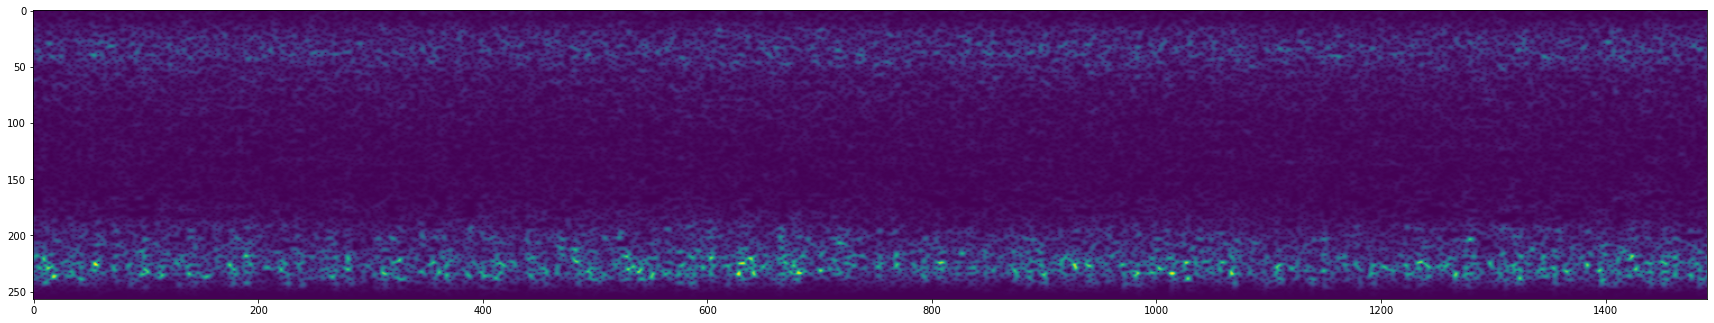

In [68]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **Create Training and Testing Partitions**

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)